In [2]:
import numpy as np
import math
import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

import pandas as pd
import pandas_datareader as web

In [160]:
df = web.DataReader('6888.KL', data_source='yahoo', start='2011-05-12',end='2020-05-12')
df.to_csv('stock5.csv')
df = pd.read_csv('stock5.csv')

In [161]:
df = df.set_index('Date')

# Analysis 

In [171]:
df.tail()
df.index

Index(['2011-05-12', '2011-05-13', '2011-05-16', '2011-05-18', '2011-05-19',
       '2011-05-20', '2011-05-23', '2011-05-24', '2011-05-25', '2011-05-26',
       ...
       '2020-02-28', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12'],
      dtype='object', name='Date', length=2183)

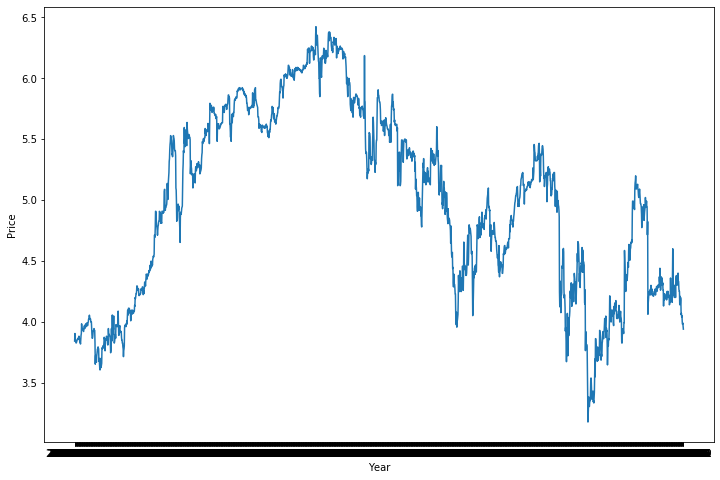

In [172]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize = (12,8))
plt.plot(df['Adj Close'])
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

In [118]:
df['New']=df['Open']-df['Close']
max(df['New'])

0.5799999237060551

In [119]:
min(df['New'])

-0.509999752044676

In [120]:
df['New'].idxmin(axis = 1, skipna = True)

1039

In [121]:
df['New'].idxmax(axis = 1, skipna = True)

1831

# Train

In [125]:
df2=[]
df2 = df[['Adj Close']] 

print(df2.head())

   Adj Close
0   3.842375
1   3.904225
2   3.857837
3   3.842375
4   3.850106


In [126]:
forecast_out = 30
df2['Prediction'] = df2[['Adj Close']].shift(-forecast_out)

print(df2.head())

   Adj Close  Prediction
0   3.842375    3.936249
1   3.904225    3.928361
2   3.857837    3.920472
3   3.842375    3.944138
4   3.850106    3.952026


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [173]:
X = np.array(df2.drop(['Prediction'], 1))
len(X)

2183

In [174]:
#reserving 60 data for testing
X_new = X[0:2123]
len(X_new) + 60

2183

In [111]:
X_new[0:10]

array([[3.84237504],
       [3.90422487],
       [3.8578372 ],
       [3.84237504],
       [3.85010648],
       [3.82691312],
       [3.82691312],
       [3.83464408],
       [3.84237504],
       [3.85010648]])

In [112]:
y = np.array(df2['Prediction'])
y_new = y[:-60]
len(y_new)

2123

In [113]:
y_new[0:10]

array([3.93624878, 3.9283607 , 3.92047215, 3.94413781, 3.95202613,
       3.96780252, 3.94413781, 3.95202613, 3.97568941, 3.95991349])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2)

In [100]:
y = np.array(df2['Prediction'])
y = y[:-forecast_out]
print(y)
len(y)

[3.03833699 3.04606795 3.03833699 ... 3.99000001 3.96000004 3.94000006]


2400

## Prediction

In [101]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [176]:
y_pre = lr.predict(X[2153:2183])
print("Predicted last 30 days")
print(y_pre)

Predicted last 30 days
[4.36727855 4.27632697 4.41275391 4.43094414 4.44003947 4.41275391
 4.36727855 4.43094414 4.42184924 4.44003947 4.4582297  4.39456368
 4.39456368 4.33999299 4.32180276 4.32180276 4.22175628 4.2854223
 4.23085161 4.27632697 4.25813674 4.14899536 4.15809069 4.13080513
 4.13990046 4.09442467 4.07623444 4.08532956 4.05804422 4.03985399]


In [177]:
confidence = lr.score(X_test, y_test)
print("Confidence Score: ", confidence)

Confidence Score:  0.8267341907690983


In [178]:
x_forecast = np.array(df2.drop(['Prediction'], 1))[-forecast_out:]
print("Actual last 30 days: ")
print(x_forecast)

Actual last 30 days: 
[[4.30000019]
 [4.19999981]
 [4.3499999 ]
 [4.36999989]
 [4.38000011]
 [4.3499999 ]
 [4.30000019]
 [4.36999989]
 [4.36000013]
 [4.38000011]
 [4.4000001 ]
 [4.32999992]
 [4.32999992]
 [4.26999998]
 [4.25      ]
 [4.25      ]
 [4.13999987]
 [4.21000004]
 [4.1500001 ]
 [4.19999981]
 [4.17999983]
 [4.05999994]
 [4.07000017]
 [4.03999996]
 [4.05000019]
 [4.        ]
 [3.98000002]
 [3.99000001]
 [3.96000004]
 [3.94000006]]


Text(0, 0.5, 'Price')

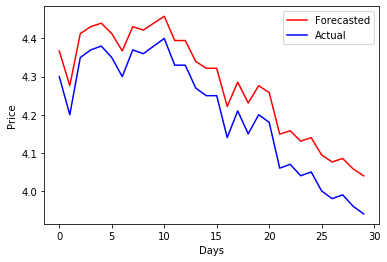

In [179]:
plt.plot(y_pre, color='r')
plt.plot(x_forecast, color='b')
plt.legend(['Forecasted', 'Actual'])
plt.xlabel("Days")
plt.ylabel("Price")